# import needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read csv file

In [2]:
df = pd.read_csv('./datasets/housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# delete Outlier data

In [3]:
df = df[df['Area'].str.isdigit().fillna(True)]

### delete null address

In [4]:
df = df[pd.notnull(df['Address'])]

# encode data

In [5]:
df['Parking'] = df.Parking.astype('category').cat.codes

In [6]:
df['Warehouse'] = df['Warehouse'].astype('category').cat.codes

In [7]:
df['Elevator'] = df['Elevator'].astype('category').cat.codes

In [8]:
df['Address'] = df['Address'].astype('category').cat.codes

## normalize Area

In [9]:
df['Area'] = df['Area'].replace([' ',','],'',regex=True)
df['Area'] = df['Area'].astype(int)

# hist chart

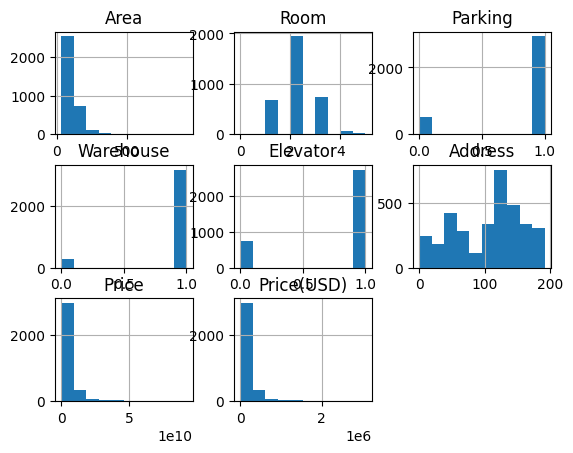

In [10]:
df.hist()
plt.show()

# find outlier data

<Axes: ylabel='Area'>

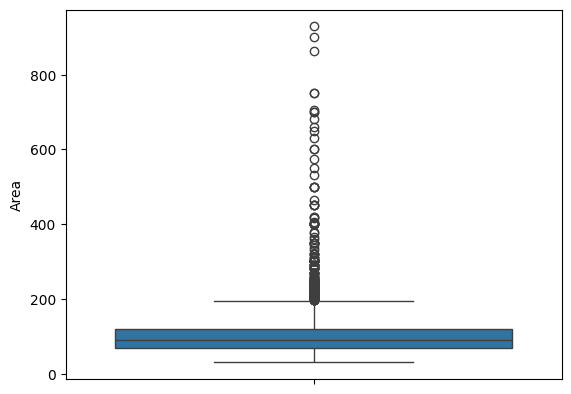

In [11]:
sns.boxplot(df['Area'])

# iqr method
### Area

In [12]:
q1_A = df['Area'].quantile(0.25)
q3_A = df['Area'].quantile(0.75)
iqr_A = q3_A - q1_A

In [13]:
uppre_limit_A = q3_A + (1.5 * iqr_A)
uppre_limit_A

196.5

In [14]:
#delete outlier
new_df = df.loc[df['Area'] < uppre_limit_A]

# lets plot Price values with respect to Area


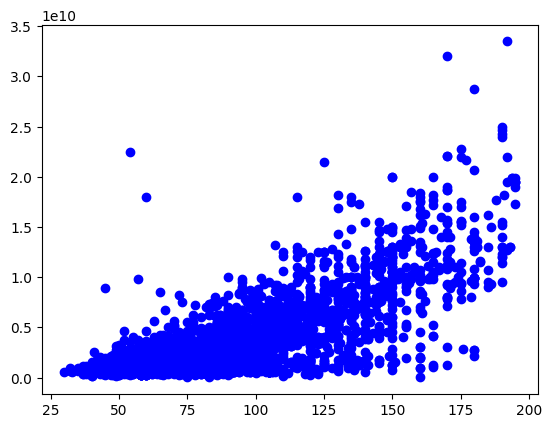

In [15]:
plt.scatter(new_df['Area'], new_df['Price'], color = 'blue')
plt.show()

# train & test data

In [16]:
X = new_df[['Area']]
y = new_df[['Price']]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=6)
x_train = np.asanyarray(x_train)
x_test = np.asanyarray(x_test)
y_train = np.asanyarray(y_train)
y_test = np.asanyarray(y_test)

# Polynomial Features

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)

# fit train data

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train_y_ = lr.fit(train_x_poly, y_train)

# coef and intersept

In [20]:
c = lr.intercept_
m = lr.coef_
print('coeff is : ', m)
print('intercept is : ', c)


coeff is :  [[        0.         -42567961.17771362    592025.15767977]]
intercept is :  [2.03795092e+09]


# Scatter

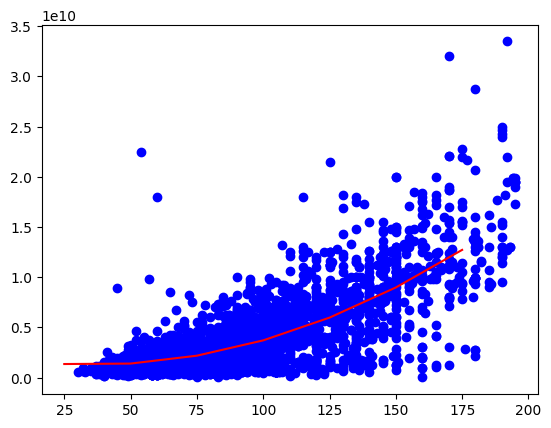

In [21]:
plt.scatter(X, y, color = 'blue')
xx = np.arange(25, 200, 25)
yy = c[0] + m[0][1]*xx + m[0][2]*np.power(xx, 2)
plt.plot(xx, yy, '-r')

# predict and R2_score
predict test data and calculate R2_score

In [22]:
test_x_poly = poly.fit_transform(x_test)
test_y_ = lr.predict(test_x_poly)

In [23]:
from sklearn.metrics import r2_score
print('R2-Score: ', r2_score(y_test, test_y_))

R2-Score:  0.656534557504571
